In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## 1- Data Preparation

In [ ]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(
    num_words = 10000
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
word_index = datasets.imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(word_index)

88584

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
train_labels[0]

1

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0][23]

0.0

In [ ]:
lengths = [len(i) for i in train_data]
print(np.max(lengths))
print(np.min(lengths))
print(np.mean(lengths))

2494
11
238.71364


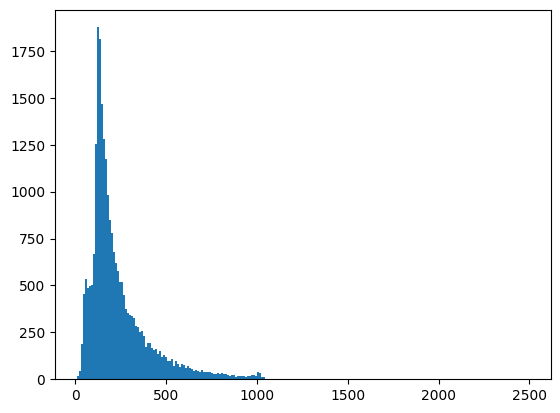

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths, bins='auto')
plt.show()

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 2- Model Design

In [ ]:
model = Sequential([
    layers.Input(shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

## 3- Training

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6757 - loss: 0.6453 - val_accuracy: 0.8523 - val_loss: 0.4331
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8843 - loss: 0.3604 - val_accuracy: 0.8834 - val_loss: 0.3076
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9279 - loss: 0.2268 - val_accuracy: 0.8868 - val_loss: 0.2796
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9457 - loss: 0.1707 - val_accuracy: 0.8858 - val_loss: 0.2789
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9618 - loss: 0.1316 - val_accuracy: 0.8860 - val_loss: 0.2862
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9739 - loss: 0.1049 - val_accuracy: 0.8838 - val_loss: 0.3028
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9823 - loss: 0.0801 - val_accuracy: 0.8819 - val_loss: 0.3244
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9871 - loss: 0.0621 - val_accuracy: 0.8805 - v

## 4- Evaluation

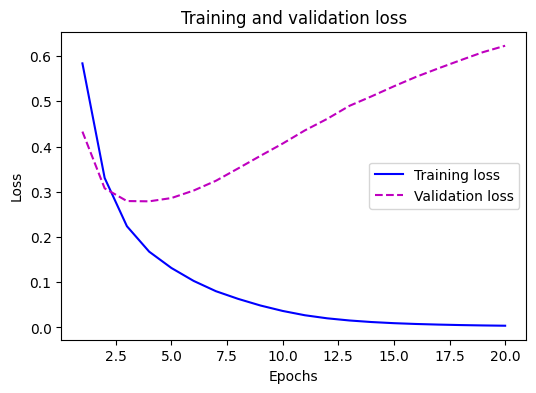

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(6,4))
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "m--", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

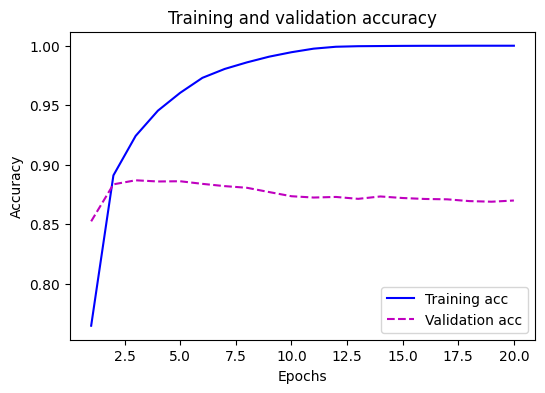

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.figure(figsize=(6,4))
plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "m--", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.6872


In [ ]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Test Loss: 0.6734057664871216
Test Accuracy: 0.8566799759864807


In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    batch_size=512,
                    epochs=4,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6769 - loss: 0.6221 - val_accuracy: 0.8590 - val_loss: 0.3964
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8957 - loss: 0.3239 - val_accuracy: 0.8854 - val_loss: 0.2952
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9354 - loss: 0.2046 - val_accuracy: 0.8876 - val_loss: 0.2776
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9571 - loss: 0.1466 - val_accuracy: 0.8855 - val_loss: 0.2842


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8757 - loss: 0.3048
Test Loss: 0.3027251064777374
Test Accuracy: 0.8783599734306335
